In [1]:
import sys,os
path=os.path.dirname(os.getcwd())
sys.path.append(path)
from unityagents  import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#for 20 agents:
env = UnityEnvironment(file_name=path+'/Reacher_Windows_x86_64_20/Reacher.exe')
#for 1 agent:
# env = UnityEnvironment(file_name=path+'/Reacher_Windows_x86_64/Reacher.exe')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [2]:
from ppo_agent import *
agent=AgentPPO(state_size, action_size, seed=1, lr=0.0003)

In [ ]:
from ppo_train import *
mean_rewards,min_rewards,max_rewards,mavg_rewards,stats=ppo_train(agent,env,brain_name,episode=500,discount=0.99,
                                                              eta=0.95,epsilon=0.2,beta=0.01,c1=0.5,delta=0.1,
                                                              max_t=1000,SGD_epoch=30,loss_kind='entropy_exact',
                                                              target_score=30,clip=0.2)

Episode 100	Average Score: 17.34
Episode 144	Average Score: 30.19

Environment solved in 144 episodes!	Average Score: 30.19


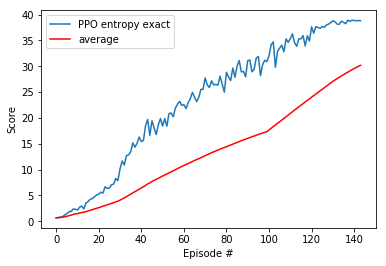

In [10]:
from plot_saved_results import *
plot_results(f'Checkpoints/mean_rewardsPPOsolvedin14416minutesentropy_exactdis0.99eta0.95c10.5beta0.01sgd30clip0.2','PPO entropy exact')

Load the checkpoint and watch it play:

In [3]:
agent.policy.load_state_dict(torch.load(f'Checkpoints/0.990.950.20.010.50.1100030KL_entropy_approximate0.20.0003solved146.pth',map_location=device))

We see perfect max score achieved in almost all of the ten consecutive runs below.

epsiode 1 max 39.6 min 29.9 average 36.5 
epsiode 2 max 39.5 min 28.8 average 36.8 
epsiode 3 max 39.5 min 27.8 average 36.8 
epsiode 4 max 39.5 min 26.0 average 35.4 
epsiode 5 max 39.6 min 25.8 average 34.2 
epsiode 6 max 39.6 min 25.8 average 35.1 
epsiode 7 max 39.6 min 30.3 average 37.8 
epsiode 8 max 39.6 min 29.3 average 36.9 
epsiode 9 max 39.6 min 28.2 average 36.1 
epsiode 10 max 39.6 min 23.7 average 36.4 


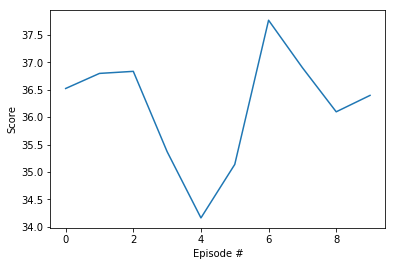

In [8]:
from agent_play import *
score_list=agent_play(agent,env,brain_name,train_mode=False,view_episodes=1,ppo=True)
#below is a run with train_mode=True and view_episodes=10

In [ ]:
env.close()